In [1]:
# importing libraries 
from bs4 import BeautifulSoup 
import requests 

In [2]:
# instagram URL 
URL = "https://www.instagram.com/{}/"

In [3]:
# parse function 
def parse_data(s): 
      
    # creating a dictionary 
    data = {} 
      
    # splittting the content  
    # then taking the first part 
    s = s.split("-")[0] 
      
    # again splitting the content  
    s = s.split(" ") 
      
    # assigning the values 
    data['Followers'] = s[0] 
    data['Following'] = s[2] 
    data['Posts'] = s[4] 
      
    # returning the dictionary 
    return data

In [4]:
# scrape function 
def scrape_data(username): 
      
    # getting the request from url 
    r = requests.get(URL.format(username)) 
      
    # converting the text 
    s = BeautifulSoup(r.text, "html.parser") 
      
    # finding meta info 
    meta = s.find("meta", property ="og:description") 
    
    # calling parse method 
    return parse_data(meta.attrs['content']) 

In [5]:
  # main function 
if __name__=="__main__": 
    
      
    # user name 
    usernames=["daurcomm","radioqaum","aahatadotcom","react.please","daur_ed","thevirtualnetwork"]
    followers_count=[]
    posts=[]
    #username = "the_drunken_astronaut"
    for username in usernames:
        
    # calling scrape function 
        data = scrape_data(username) 
        followers_count.append(data['Followers'])
        posts.append(data['Posts'])
    # printing the info 
    followers_count = [int(i) for i in followers_count] 
    posts = [int(i) for i in posts] 
    print(followers_count) 
    print(posts)

[940, 438, 809, 110, 129, 851]
[11, 87, 97, 21, 39, 96]


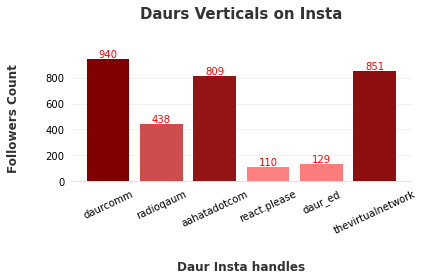

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np

# Colorize the graph based on likeability:
likeability_scores = np.array(followers_count)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
        
        
    }
)

fig, ax = plt.subplots()
#plt.bar(usernames,followers_count)
bars = ax.bar(usernames,followers_count,color=color_map(data_normalizer(likeability_scores)))
plt.xticks(rotation=25, fontname='dejavu sans')

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 14.0,
      round(bar.get_height()),
      horizontalalignment='center',
      color='red'
  )
    
ax.set_xlabel('Daur Insta handles', labelpad=25, color='#333333', fontsize=12, weight='bold')
ax.set_ylabel('Followers Count', labelpad=25, color='#333333', fontsize=12, weight='bold')
ax.set_title('Daurs Verticals on Insta', pad=35, color='#333333', fontsize=15,
             weight='bold')

fig.tight_layout()

plt.show()

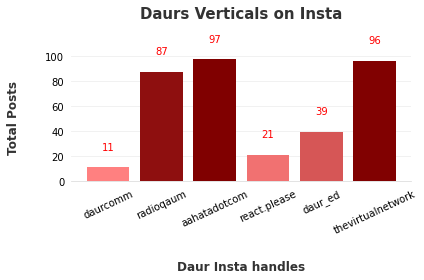

In [10]:
# Colorize the graph based on likeability:
likeability_scores = np.array(posts)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
        
        
    }
)

fig, ax = plt.subplots()
#plt.bar(usernames,followers_count)
bars = ax.bar(usernames,posts,color=color_map(data_normalizer(likeability_scores)))
plt.xticks(rotation=25, fontname='dejavu sans')

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 14.0,
      round(bar.get_height()),
      horizontalalignment='center',
      color='red'
  )
    
ax.set_xlabel('Daur Insta handles', labelpad=25, color='#333333', fontsize=12, weight='bold')
ax.set_ylabel('Total Posts', labelpad=25, color='#333333', fontsize=12, weight='bold')
ax.set_title('Daurs Verticals on Insta', pad=35, color='#333333', fontsize=15,
             weight='bold')

fig.tight_layout()

plt.show()